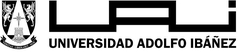

# Laboratorio S01: Tensores y regresión lineal

## _Deep learning_

**Profesor**: Dr. Juan Bekios Calfa

**Grado**: Magíster en Inteligencia Artificial


# Laboratorio 01: Regresión Lineal y Redes Neuronales

## Objetivo:

1.   Introducción a tensores.
2.   Implementar el algoritmo de regresión lineal utilizando Python.
3.   Implementar el algoritmo de regresión lineal utilizando las librerías Torch.
4. Implementar el algoritmo de regresión lineal utilizando Torch.

## 1. Introducción a tensores

Un tensor PyTorch es básicamente lo mismo que una matriz numpy: no sabe nada sobre aprendizaje profundo o 
gráficos computacionales o gradientes, y es solo una matriz genérica n-dimensional que se utilizará para 
el cálculo numérico arbitrario.

![picture](https://empresas.blogthinkbig.com/wp-content/uploads/2020/04/tensor1.png?resize=640%2C423)


### 1.1 Crear un tensor

In [2]:
#!pip install torch
import torch # Librería para implementar redes neuronales
import numpy as np

In [3]:
# Crear un tensor vacío: No inicializado
x1 = torch.empty(1) # escalar
print(x1.shape)

x2 = torch.empty(3) # vector, 1D
print(x2.shape)

x3 = torch.empty(2,3) # matriz, 2D
print(x3.shape)

x4 = torch.empty(2,2,3) # tensor, 3 dimensions
print(x4.shape)
x5 = torch.empty(2,2,2,3) # tensor, 4 dimensions
print(x5)

torch.Size([1])
torch.Size([3])
torch.Size([2, 3])
torch.Size([2, 2, 3])
tensor([[[[0.0000e+00, 0.0000e+00, 3.5733e-43],
          [0.0000e+00, 0.0000e+00, 0.0000e+00]],

         [[0.0000e+00, 0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00]]],


        [[[3.5733e-43, 0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00]],

         [[0.0000e+00, 0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00]]]])


In [4]:
# Lista python construir un tensor
list = [[1,2], [3, 4], [5, 6]]
tensor1 = torch.tensor(list)

print(tensor1)
print(tensor1.shape)

# Crear un tensor de una lista
tensor2 = torch.tensor([[1,2], [3, 4], [5, 6]])
#print(tensor2)

# Crear un tensor a partir de una matriz numpy
imagen = np.array([1,2,3,4])
tensor3 = torch.tensor(imagen)
#print(tensor3)
#print(tensor3.shape)

# Torch tensor de números aleatorios
tensor4 = torch.rand(2,3)
print(tensor4)
print(tensor4.shape)

tensor([[1, 2],
        [3, 4],
        [5, 6]])
torch.Size([3, 2])
tensor([[0.9373, 0.3265, 0.0372],
        [0.6599, 0.8751, 0.0865]])
torch.Size([2, 3])


### 1.2 Estructura de un tensor

El método *size()* permite ver el tamaño de un tensor, su rango y las dimensiones.

In [7]:
print(tensor1.size())

torch.Size([3, 2])


### 1.3 Acceso a un tensor

Los elementos de un tensor pueden ser accesados de la misma manera que en **numpy** (librerías de matrices de Python).

In [8]:
print(tensor1)
print(tensor1[1]) # Obtengo la fila dos de el tensor (completa)
print(tensor1[1,1]) # Obtengo el elemento de la posición de la fila 2 y columna 2

tensor([[1, 2],
        [3, 4],
        [5, 6]])
tensor([3, 4])
tensor(4)


### 1.4 Uso de tensores con CUDA (GPU)

Pytorch permite trabajar con CUDA para realizar operaciones matemáticas en GPU (Si se cuenta con una).

In [9]:
print(torch.cuda.is_available())
print(torch.cuda.current_device())
print(torch.cuda.get_device_name(0))

False


AssertionError: Torch not compiled with CUDA enabled

### 1.5 CPU vs GPU

In [10]:
%%time
# Tiempo CPU
for i in range(500):
  x = torch.randn(1000, 1000)
  y = torch.randn(1000, 1000)
  z = torch.matmul(x, y)

CPU times: user 27.5 s, sys: 997 ms, total: 28.5 s
Wall time: 35.7 s


In [11]:
%%time
# Tiempo GPU
cuda0 = torch.device('cuda:0')
for i in range(500):
  x = torch.randn(1000, 1000, device=cuda0)
  y = torch.randn(1000, 1000, device=cuda0)
  z = torch.matmul(x, y)

AssertionError: Torch not compiled with CUDA enabled

## 2. Regresión lineal (I):

Se realiza el cálculo de una regresión lineal por medio del cálculo manual de los gradientes (derivada de la función de pérdida).

Como ejemplo utilizaremos base de datos muy simple. La hipótesis será lineal:

$$y = \theta_0 \cdot x$$

Sin intercepto o _bias_ para simplificar el problema y explicarlo con claridad.


### Base de datos

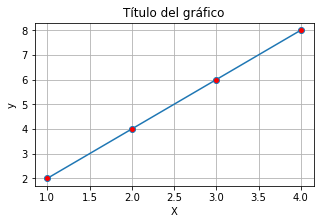

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))

X = np.array([1, 2, 3, 4], dtype=np.float32)
y = np.array([2, 4, 6, 8], dtype=np.float32)

plt.plot(X, y, marker='o', markerfacecolor='red')
plt.title('Título del gráfico')
plt.xlabel('X')
plt.ylabel('y')
plt.grid(True)

### 2.1 Regresión lineal utilizando descenso de gradiente

Para calcular una regresión lineal utilizando **descenso de gradiente** debemos contar con los siguientes constructos:



*  **Hipótesis:** Función de lineal, para el ejemplo nuestra hipótesis será: $$\hat{y}=\theta_0 \cdot x$$ Es la fución que hace la predicción una vez que fueron aprendidos los parámetros, también se denota como: $$\hat{y}=h_\theta(x)$$


*  **Función de pérdida**: Error cuadrático medio (MSE, _mean squared error_), $$l(y,\hat{y})=\frac{1}{N}\cdot (y -\hat{y})^2$$

*  **Derivada de la función de pérdida**: $$\frac{dl}{d\theta_0} = \frac{1}{N}\cdot 2x(\theta_0 x - y)$$

In [14]:
import numpy as np

X = np.array([1, 2, 3, 4], dtype=np.float32)
y = np.array([2, 4, 6, 8], dtype=np.float32)

# Inicializo con cualquier valor los tetas (W)
W = 0.0

# Hipótesis: Lineal (f(x)=w*x)
def forward(x):
  return W * X

# Loss: MSE
def loss(y, y_pred):
  return ((y - y_pred)**2).mean()

# Gradiente
# L = MSE = 1/N * (w*x - y) ** 2
# dL/dW = 1/N * 2x(w*x -y)
def gradient(x, y, y_pred):
  return np.dot(2*x, y_pred - y).mean()


In [15]:
# Entrenar nuestro modelo: Descenso de gradiente.
learning_rate = 0.01
n_iter = 20

for epoch in range(n_iter):
  # Prediccion
  y_pred = forward(X)

  # Error
  l = loss(y, y_pred)

  # Calculo de gradientes 
  dw = gradient(X, y, y_pred)

  # Actualizar los pesos
  W = W - learning_rate * dw

  if epoch % 2 == 0:
    print(f'epoch {epoch+1}: w = {W:.3f}, loss = {l:.8f}')

epoch 1: w = 1.200, loss = 30.00000000
epoch 3: w = 1.872, loss = 0.76800019
epoch 5: w = 1.980, loss = 0.01966083
epoch 7: w = 1.997, loss = 0.00050331
epoch 9: w = 1.999, loss = 0.00001288
epoch 11: w = 2.000, loss = 0.00000033
epoch 13: w = 2.000, loss = 0.00000001
epoch 15: w = 2.000, loss = 0.00000000
epoch 17: w = 2.000, loss = 0.00000000
epoch 19: w = 2.000, loss = 0.00000000


### 2.2 Regresión lineal (II):

En este caso se realiza el cálculo de los parámetros de la regresión lineal por medio del cálculo manual de los gradientes (derivada de la función de pérdida).

In [1]:
import torch

# Pasar todos los vectores a tensores
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32) #float de 16 hoy en día
y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True) #escalar

# Salida modelo (prediccion del modelo)
def forward(x):
  return x * w
  
# loss = MSE (función de pérdida) gradiente lo calcula automático
def loss(y, y_pred):
  return ((y_pred - y)**2).mean()

print(f'Prediccion antes del entrenamiento: f(5) = {forward(5).item():.3f}')

Prediccion antes del entrenamiento: f(5) = 0.000


In [2]:
# Fase: Entrenamiento
learning_rate = 0.02 #
n_iter = 50

for epoch in range(n_iter):
  # 1. Prediccion
  y_pred = forward(X)

  # 2. Calcular error
  l = loss(y, y_pred)

  # 3. Calcular los gradientes
  l.backward()

  # 4. Actualizar los pesos
  with torch.no_grad():
    w -= learning_rate * w.grad # esta operación es igual a w = w - learning_rate * w.grad

  # 5. Dejar en zero los valores de gradiente de w
  w.grad.zero_()

  if epoch % 3 == 0:
    print(f'epoch {epoch}: w = {w.item():.3f}, loss = {l.item():.8f}')

print(f'Predicción después de entrenar: f(5) = {forward(5).item():.3f}')


epoch 0: w = 0.600, loss = 30.00000000
epoch 3: w = 1.520, loss = 3.52946997
epoch 6: w = 1.835, loss = 0.41523871
epoch 9: w = 1.944, loss = 0.04885240
epoch 12: w = 1.981, loss = 0.00574747
epoch 15: w = 1.993, loss = 0.00067618
epoch 18: w = 1.998, loss = 0.00007955
epoch 21: w = 1.999, loss = 0.00000936
epoch 24: w = 2.000, loss = 0.00000110
epoch 27: w = 2.000, loss = 0.00000013
epoch 30: w = 2.000, loss = 0.00000002
epoch 33: w = 2.000, loss = 0.00000000
epoch 36: w = 2.000, loss = 0.00000000
epoch 39: w = 2.000, loss = 0.00000000
epoch 42: w = 2.000, loss = 0.00000000
epoch 45: w = 2.000, loss = 0.00000000
epoch 48: w = 2.000, loss = 0.00000000
Predicción después de entrenar: f(5) = 10.000


### 2.3. Regresión lineal (III):

Cálculo de los parámetros de la regresión lineal utilizando Pytorch (derivada de la función de pérdida).

In [2]:
import torch # Librerias base
import torch.nn as nn # Construir los modelos
import numpy as np    
import matplotlib.pyplot as plt

In [3]:
def gradiente_descent(X, y, iters=10):
  n_samples, n_features = X.shape

  # 1.1) Defino la hipotesis
  input_size = n_features
  output_size = 1
  model = nn.Linear(input_size, output_size, bias=False)

  # 1.2) Funcion de perdida y configurar los parametros del optimizador
  learning_rate = 0.01
  criterion = nn.MSELoss()
  optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

  # 1.3) Ciclo de entrenamiento
  num_epochs = iters
  for epoch in range(num_epochs):
    # Calcular la prediccion
    y_predicted = model(X)
    loss = criterion(y_predicted, y)

    # Actualiza el modelo
    loss.backward() #Calcular los gradientes
    optimizer.step()

    # Dejar los gradientes en cero
    optimizer.zero_grad()

    if epoch % 2 == 0:
      print(f'epoch {epoch}:  loss = {loss.item():.8f}') 
    
  return model  

In [4]:
def plot_fit(X_numpy, y_numpy, y_pred):
  plt.plot(X_numpy, y_numpy, 'ro', label='$Y_{real}$')
  plt.plot(X_numpy, y_pred, 'bo', label='$Y_{estimado}$')
  plt.xlabel('X - Variable Independiente')
  plt.ylabel('Y - Variable Dependiente')
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
  plt.show()


## 3. Visualización del descenso de gradiente

epoch 0:  loss = 6297.18750000


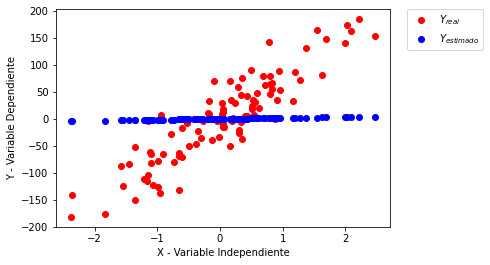

In [25]:
from sklearn import datasets
#import matplotlib.pyplot as plt

# 0) Cargar datos
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=40, random_state=4)

# cast a Tensor
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0],1)

# 1) Entrenamiento
model = gradiente_descent(X, y, iters=1)

# 2) Graficar
predicted = model(X).detach().numpy()

plot_fit(X_numpy, y_numpy, predicted)

epoch 0:  loss = 6223.72167969
epoch 2:  loss = 5850.65039062
epoch 4:  loss = 5505.07324219


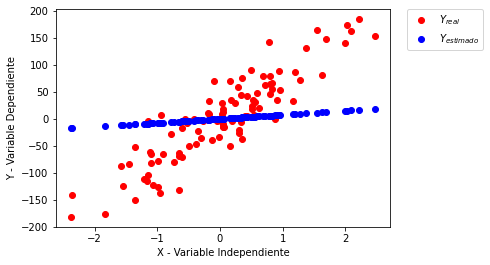

In [26]:
# 1) Entrenamiento
model = gradiente_descent(X, y, iters=5)

# 2) Graficar
predicted = model(X).detach().numpy()

plot_fit(X_numpy, y_numpy, predicted)

epoch 0:  loss = 6455.19238281
epoch 2:  loss = 6065.06298828
epoch 4:  loss = 5703.68359375
epoch 6:  loss = 5368.93603516
epoch 8:  loss = 5058.85839844
epoch 10:  loss = 4771.63232422
epoch 12:  loss = 4505.57373047
epoch 14:  loss = 4259.12158203
epoch 16:  loss = 4030.83251953
epoch 18:  loss = 3819.36621094


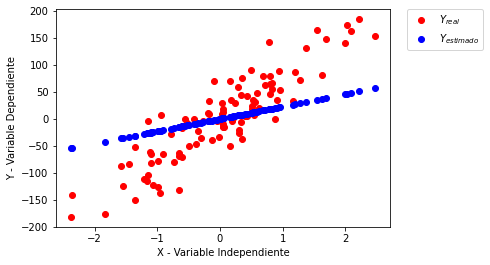

In [27]:
# 1) Entrenamiento
model = gradiente_descent(X, y, iters=20)

# 2) Graficar
predicted = model(X).detach().numpy()

plot_fit(X_numpy, y_numpy, predicted)

epoch 0:  loss = 6405.82177734
epoch 2:  loss = 6019.33007812
epoch 4:  loss = 5661.32128906
epoch 6:  loss = 5329.69677734
epoch 8:  loss = 5022.51074219
epoch 10:  loss = 4737.96289062
epoch 12:  loss = 4474.38476562
epoch 14:  loss = 4230.23193359
epoch 16:  loss = 4004.07153320
epoch 18:  loss = 3794.57788086
epoch 20:  loss = 3600.52343750
epoch 22:  loss = 3420.76977539
epoch 24:  loss = 3254.26318359
epoch 26:  loss = 3100.02758789
epoch 28:  loss = 2957.15844727
epoch 30:  loss = 2824.81738281
epoch 32:  loss = 2702.22998047
epoch 34:  loss = 2588.67675781
epoch 36:  loss = 2483.49194336
epoch 38:  loss = 2386.05834961
epoch 40:  loss = 2295.80541992
epoch 42:  loss = 2212.20361328
epoch 44:  loss = 2134.76318359
epoch 46:  loss = 2063.02929688
epoch 48:  loss = 1996.58215332
epoch 50:  loss = 1935.03186035
epoch 52:  loss = 1878.01745605
epoch 54:  loss = 1825.20483398
epoch 56:  loss = 1776.28405762
epoch 58:  loss = 1730.96911621
epoch 60:  loss = 1688.99316406
epoch 62:  lo

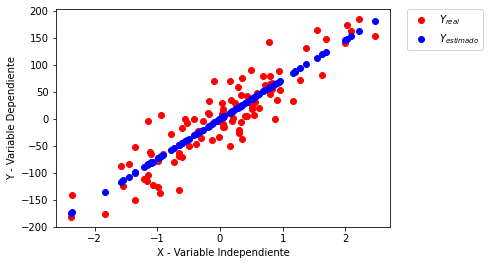

In [28]:
# 1) Entrenamiento
model = gradiente_descent(X, y, iters=300)

# 2) Graficar
predicted = model(X).detach().numpy()

plot_fit(X_numpy, y_numpy, predicted)

# Laboratorio corto 1:

## Objetivos

* Implementar un programa en Python (No es necesario usar Pytorch)
* Utilizar las operaciones matriciales de Python
* Implementar red neuronal _feedfordward_ utilizando pesos aleatorios, **no se debe aprender los pesos**.

Dada la siguiente red neuronal

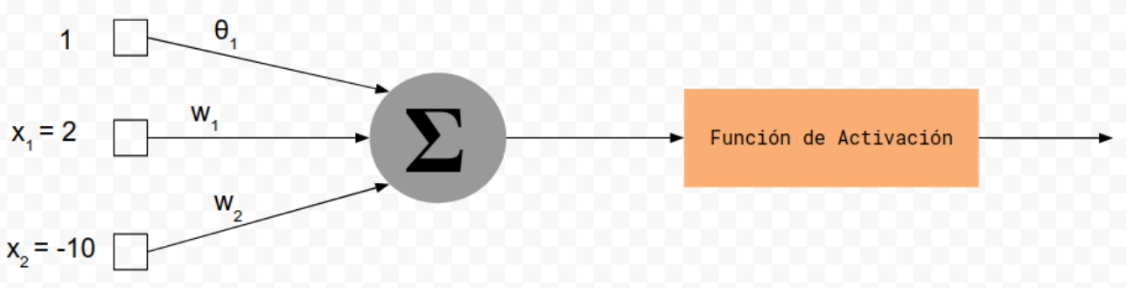

Pruebe 100.000 vectores de pesos ($w$) generados al azar que mejor se ajustan a los siguientes datos de entrenamiento.

| $x_1$ | $x_2$ | $y$ |
|-------|-------|-----|
| 1.0   | 1.5   | 3.0 |
| 2.7   | 2.2   | 4.0 |
| 3.2   | 3.3   | 5.0 |
| 4.1   | 4.0   | 6.0 |
| 5.0   | 5.2   | 7.0 |
| 6.1   | 6.3   | 8.0 |
| 7.4   | 7.9   | 9.0 |

Escriba el programa en Python, utilice GPU y una representación matricial para poder resolver el problema.

Considere mínimos cuadrados como función de pérdida ($loss$).

##Entrega:

En el mismo colab, implemente el código documentado y explique los resultados obtenidos.

## Resultados

Escribir los resultados aquí...